In [42]:
import numpy as np
from scipy import io
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import cv2

## Dataset Description

The HODA handwritten digit dataset is the first large-scale collection of Persian handwritten digits,containing 102,353 binary images. It was created during a master's project on handwritten form recognition.The data was extracted from approximately 12,000 registration forms from the 2004 national M.Sc. entrance exam and the 2003 associate degree entrance exam of Iran's University of Applied Science and Technology.

Source: 
H. Khosravi and E. Kabir, "Introducing a very large dataset of handwritten Farsi digits and a study on their varieties," Pattern Recognition Letters, vol. 28, pp. 1133-1141, 2007.


dict_keys(['__header__', '__version__', '__globals__', 'Data', 'labels'])


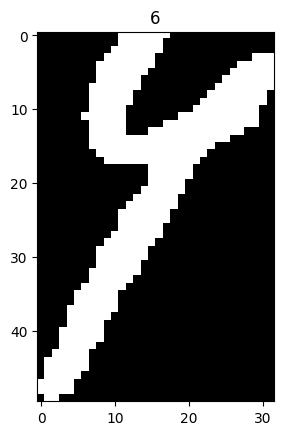

In [43]:
#loading our dataset with scipy
dataset = io.loadmat('./dataset/Data_hoda_full.mat')

print(dataset.keys())

#Splitting Dataset to train and test sections, we may need to squeeze our data to remove unnecessary index column
X_train_original , y_train= np.squeeze(dataset['Data'][:1000]), np.squeeze(dataset['labels'][:1000])
X_test_original, y_test = np.squeeze(dataset['Data'][1000:1200]), np.squeeze(dataset['labels'][1000:1200])

#lets test the dataset and see a random number
plt.imshow(X_train_original[210], cmap='gray'); plt.title(y_train[210]);plt.show()

Text(0.5, 1.0, '6New dimension')

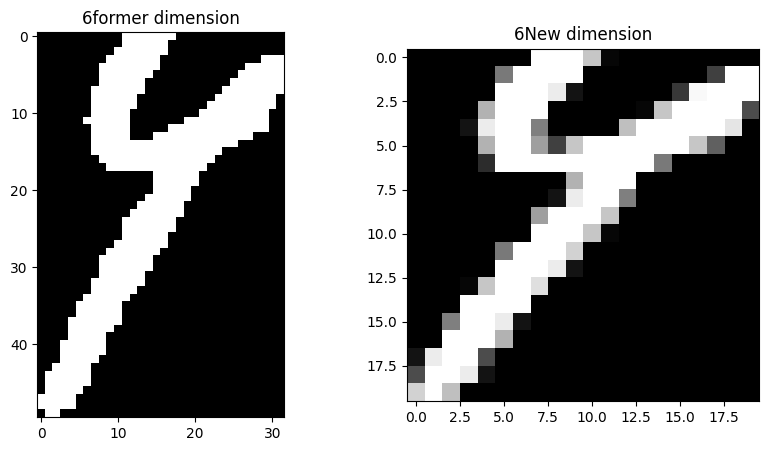

In [44]:
#lets make the data dimensions uniform and equal
#cv2.resize -> will get and img and will resize it to the new dimension
X_train_5by5 = [cv2.resize(img, dsize=(20, 20)) for img in X_train_original]
X_test_5by_5 = [cv2.resize(img, dsize=(20, 20)) for img in X_test_original]

#lets test the dataset and see a random number
plt.figure(figsize=[10,5])
plt.subplot(121);plt.imshow(X_train_original[210], cmap='gray'); plt.title(str(y_train[210]) + "former dimension")
plt.subplot(122);plt.imshow(X_train_5by5[210], cmap='gray'); plt.title(str(y_train[210]) + "New dimension")

In [45]:
#lets reshape our data sets
X_train = np.reshape(X_train_5by5, [-1,400])
X_test = np.reshape(X_test_5by_5, [-1,400])

## K Nearest Neighbor over Hoda(persian number handwriting dataset)
Here we will use KNN algorithm aim to build a model that can predict persian numbers from pictures

In [46]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

print("model's classes", model.classes_)
y_pred = model.predict(X_test)
model_reports = classification_report(y_test, y_pred)

print("\nFull Classification Report:\n", model_reports)


model's classes [0 1 2 3 4 5 6 7 8 9]

Full Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       0.93      1.00      0.97        14
           2       0.96      0.96      0.96        23
           3       0.88      0.96      0.92        24
           4       1.00      0.88      0.93        16
           5       1.00      0.90      0.95        20
           6       1.00      0.94      0.97        17
           7       1.00      1.00      1.00        30
           8       1.00      1.00      1.00        16
           9       0.96      1.00      0.98        25

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.96       200
weighted avg       0.97      0.96      0.96       200

